In [2]:
import tensorflow as tf
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
(a, y_train), (b, y_test) = tf.keras.datasets.mnist.load_data()
del(a,b)
x_shub = np.load('x_shub_2084_60_60.npy')
x_train = np.load('mnist_x_train_60000_60_60.npy')
x_test = np.load('mnist_x_test_10000_60_60.npy')
y_shub = np.load('labels.npy')

5


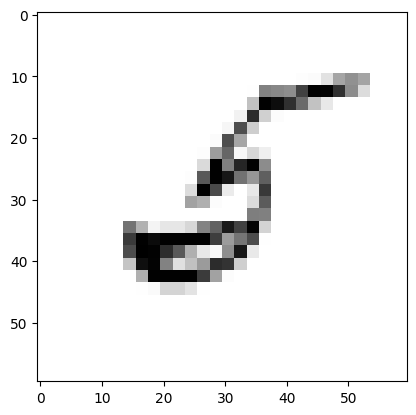

In [4]:
image_index = 1111 
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')

4


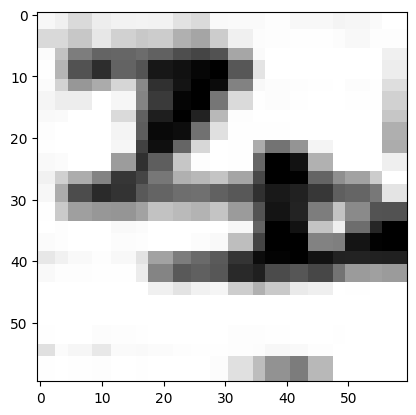

In [5]:
image_index = 1111 
print(y_shub[image_index])
plt.imshow(x_shub[image_index], cmap='Greys_r')

In [6]:
# Transform arrays to 4-dims, to use it in API Keras
x_train = x_train.reshape(x_train.shape[0], 60, 60, 1)
x_test = x_test.reshape(x_test.shape[0], 60, 60, 1)
x_shub = x_shub.reshape(x_shub.shape[0], 60, 60, 1)
input_shape = (60, 60, 1)

In [7]:
# Force data type to float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_shub = x_shub.astype('float32')

# normalazing RGB codes
x_train /= 255
x_test /= 255
x_shub /= 255
print('x_train shape:', x_train.shape)
print('x_shub shape:', x_shub.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])
print('Number of images in x_shub', x_shub.shape[0])

x_train shape: (60000, 60, 60, 1)
x_shub shape: (2084, 60, 60, 1)
Number of images in x_train 60000
Number of images in x_test 10000
Number of images in x_shub 2084


In [9]:
# Creating a Sequential Model and Adding Layers
model = Sequential()

# Adding a Feature Extraction Layer
model.add(Conv2D(60, kernel_size=(14,14), input_shape=input_shape))
# Adding a union layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# Adding a 2D Smoothing Layer to a 1D Array Before Building Fully Connected Layers
model.add(Flatten())
# Adding a dense layer
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [10]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [11]:
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 206s 110ms/step - loss: 0.2768 - accuracy: 0.9208
Epoch 2/10
1875/1875 [==============================] - 209s 111ms/step - loss: 0.1676 - accuracy: 0.9560
Epoch 3/10
1875/1875 [==============================] - 318s 169ms/step - loss: 0.1321 - accuracy: 0.9651
Epoch 4/10
1875/1875 [==============================] - 318s 170ms/step - loss: 0.1226 - accuracy: 0.9683
Epoch 5/10
1875/1875 [==============================] - 325s 173ms/step - loss: 0.1090 - accuracy: 0.9729
Epoch 6/10
1875/1875 [==============================] - 319s 170ms/step - loss: 0.1012 - accuracy: 0.9756
Epoch 7/10
1875/1875 [==============================] - 337s 180ms/step - loss: 0.1027 - accuracy: 0.9754
Epoch 8/10
1875/1875 [==============================] - 352s 188ms/step - loss: 0.0994 - accuracy: 0.9772
Epoch 9/10
1875/1875 [==============================] - 336s 179ms/step - loss: 0.0915 - accuracy: 0.9784
Epoch 10/10
1875/1875 [=======================

In [12]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 9s 29ms/step - loss: 0.0975 - accuracy: 0.9829


[0.09749111533164978, 0.9829000234603882]

In [15]:
# check if we can apply existed model to our data
model.evaluate(x_shub, y_shub)

66/66 [==============================] - 1s 18ms/step - loss: 352.7542 - accuracy: 0.0840


[352.7541809082031, 0.08397313207387924]

1/1 [==============================] - 0s 71ms/step
8


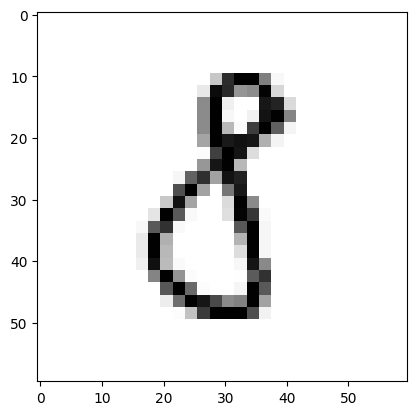

In [14]:
image_index = 1200
# plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
plt.imshow(x_test[image_index],cmap='Greys')

pred = model.predict(x_test[image_index].reshape(1, 60, 60, 1))
print(pred.argmax())

1/1 [==============================] - 0s 20ms/step
7


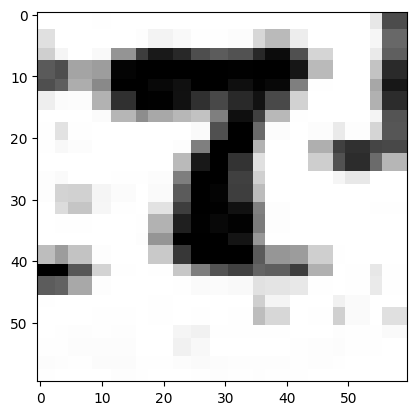

In [22]:
image_index = 1921
# plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
plt.imshow(x_shub[image_index],cmap='Greys_r')

pred = model.predict(x_shub[image_index].reshape(1, 60, 60, 1))
print(pred.argmax())

In [17]:
prediction = []
right = []

for i in range(2084):
    prediction.append(model.predict(x_shub[i].reshape(1, 60, 60, 1)).argmax())
    if prediction[len(prediction) - 1] == y_shub[i]:
        right.append(i)

1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 42ms/step


In [7]:
# count the number of png files for numbers 0-9 per number
def count_per_number(filelist):
    count = [0,0,0,0,0,0,0,0,0,0]
    for i in filelist:
        count[int(i)] += 1
        
    return count

In [19]:
print(count_per_number(prediction))

[16, 44, 120, 153, 0, 792, 0, 957, 1, 1]


In [8]:
print(count_per_number(y_train))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


In [20]:
print(len(right))

175


In [21]:
right

[39,
 40,
 44,
 45,
 57,
 65,
 69,
 79,
 80,
 175,
 202,
 203,
 204,
 206,
 207,
 209,
 262,
 263,
 265,
 266,
 267,
 268,
 291,
 297,
 298,
 299,
 302,
 303,
 305,
 317,
 454,
 455,
 456,
 457,
 459,
 515,
 516,
 517,
 520,
 523,
 524,
 525,
 527,
 528,
 529,
 536,
 541,
 542,
 545,
 546,
 547,
 548,
 578,
 583,
 584,
 593,
 770,
 774,
 775,
 784,
 785,
 786,
 808,
 810,
 812,
 814,
 815,
 818,
 832,
 843,
 850,
 854,
 925,
 926,
 927,
 928,
 930,
 972,
 973,
 975,
 976,
 980,
 982,
 985,
 988,
 993,
 999,
 1005,
 1007,
 1008,
 1009,
 1012,
 1013,
 1014,
 1015,
 1017,
 1031,
 1036,
 1055,
 1057,
 1059,
 1067,
 1068,
 1072,
 1082,
 1083,
 1084,
 1090,
 1249,
 1253,
 1254,
 1255,
 1257,
 1258,
 1259,
 1260,
 1261,
 1263,
 1264,
 1288,
 1290,
 1293,
 1299,
 1300,
 1322,
 1325,
 1327,
 1394,
 1404,
 1408,
 1410,
 1413,
 1414,
 1415,
 1418,
 1419,
 1420,
 1421,
 1423,
 1465,
 1468,
 1470,
 1472,
 1486,
 1550,
 1554,
 1744,
 1746,
 1747,
 1750,
 1755,
 1757,
 1758,
 1761,
 1788,
 1789,
 179